In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Load Dataset
df = pd.read_csv(r'C:\Users\User\Documents\juputer\student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.shape

(25, 2)

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.duplicated().isnull().sum()

0

In [10]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

## Splitt Data

In [11]:
# Membuat nilai X dan Y
X = df[['Hours']]
y = df[['Scores']]
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [12]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [14]:
X_train.shape

(18, 1)

In [15]:
X_test.shape

(7, 1)

In [16]:
X_train_reshape = X_train.values.reshape(-1,1)
X_test_resshape = X_test.values.reshape(-1, 1)

In [17]:
model_lr = LinearRegression()
model_lr.fit(X_train_reshape, y_train)

LinearRegression()

In [18]:
y_test_pred = model_lr.predict(X_test_resshape)
y_test_pred

array([[83.10733229],
       [26.76559757],
       [26.76559757],
       [69.50760322],
       [59.79351103],
       [28.70841601],
       [34.53687133]])

In [19]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_lr.predict(X_test_resshape)
y_train_pred = model_lr.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 31.14
  Test : 23.52
  Gap  : 7.62
R^2 Score:
  Train: 0.95
  Test : 0.96
      


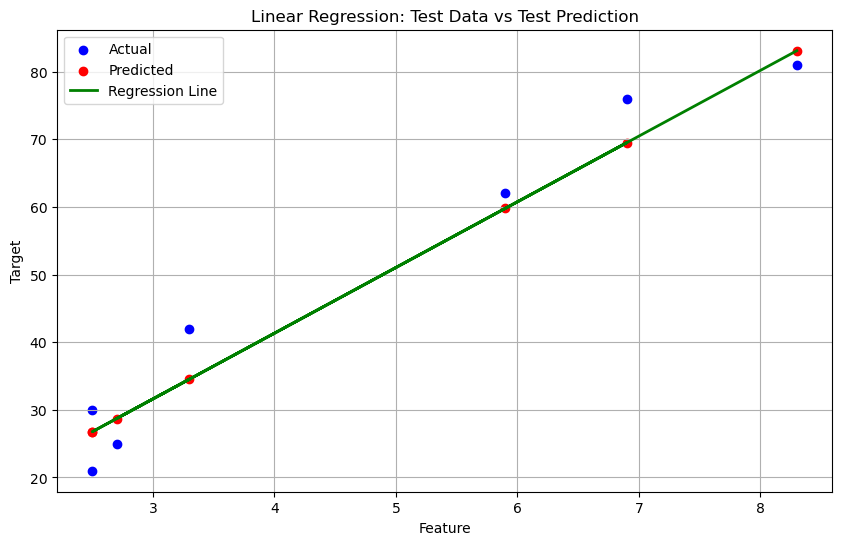

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
plt.plot(X_test, y_test_pred, color='green', label='Regression Line', linewidth=2)  # Line for predicted values
plt.title('Linear Regression: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test_resshape)
y_train_pred = model_rf.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 9.29
  Test : 37.95
  Gap  : 28.66
R^2 Score:
  Train: 0.99
  Test : 0.93
      


In [25]:
# Saving the model
import joblib
joblib.dump(model_rf, 'RandomForestRegressor_model.pkl')

['RandomForestRegressor_model.pkl']

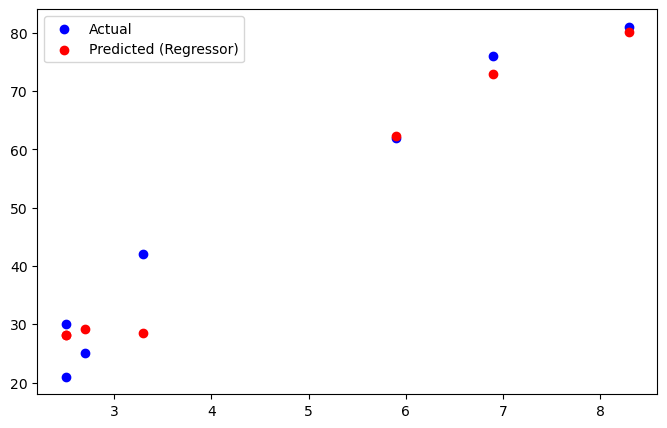

In [41]:
# Reading the model
loaded_model = joblib.load('RandomForestRegressor_model.pkl')

# Testing the model
y_pred_load = loaded_model.predict(X_test_resshape)
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_load, color='red', label='Predicted (Regressor)')
plt.legend()
plt.show()

In [28]:
models = ['Logistic Regression', 'RandomForestRegressor']
accuracy = [0.96, 0.93]  # Contoh nilai akurasi


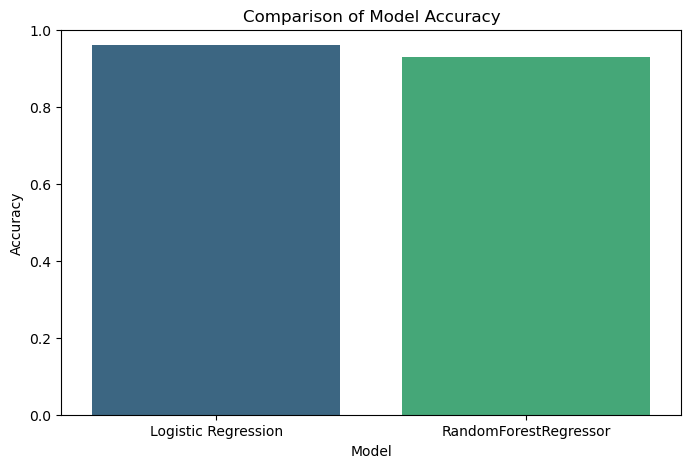

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)
plt.show()

## Sekian Terima Kasih